迴歸深度神經網路

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.datasets import boston_housing
(x_train_set,y_train_set),(x_test,y_test)=boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [9]:
x_train_set.shape,y_train_set.shape,x_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid=train_test_split(
    x_train_set,y_train_set,random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler

scal=StandardScaler()

x_train=scal.fit_transform(x_train)

x_valid=scal.transform(x_valid)
x_test=scal.transform(x_test)


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [15]:
model=Sequential()
model.add(Dense(units=100,activation='relu',input_shape=x_train.shape[1:]))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=1))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6501 (25.39 KB)
Trainable params: 6501 (25.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
weight,biases=model.layers[1].get_weights()

In [22]:
biases.shape,biases

((50,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [27]:
weight.shape,weight

((100, 50),
 array([[-0.11814442,  0.13316055,  0.10354237, ...,  0.12816529,
         -0.06518731,  0.14239822],
        [-0.05914894, -0.06511664, -0.10015159, ...,  0.02939248,
          0.10438193,  0.195361  ],
        [ 0.05084862,  0.1648779 ,  0.07834961, ..., -0.0176011 ,
         -0.14665493, -0.17094354],
        ...,
        [ 0.02391878,  0.13995405,  0.12478165, ...,  0.03315005,
          0.07120471, -0.05625662],
        [-0.12704048, -0.0962018 , -0.158497  , ..., -0.1408122 ,
          0.15022828, -0.13126498],
        [-0.17122002, -0.15362458, -0.09825611, ..., -0.09784718,
         -0.09630819,  0.06367885]], dtype=float32))

In [29]:
model.compile(loss='mse',optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=1e-3))

In [32]:
train=model.fit(x_train,y_train,
                epochs=20,
                validation_data=(x_valid,y_valid))

Epoch 1/20
10/10 [==============================] - 0s 12ms/step - loss: 553.5458 - val_loss: 470.1112
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 340.7614 - val_loss: 155.3038
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 86.3385 - val_loss: 65.3759
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 42.5444 - val_loss: 36.0319
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 27.2309 - val_loss: 26.2682
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 21.6992 - val_loss: 22.3923
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 19.0200 - val_loss: 19.5449
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 17.2666 - val_loss: 17.8286
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 15.8185 - val_loss: 16.7044
Epoch 10/20
10/10 [==============================] - 0s 3ms/step - loss: 14.5569 - val_loss: 15

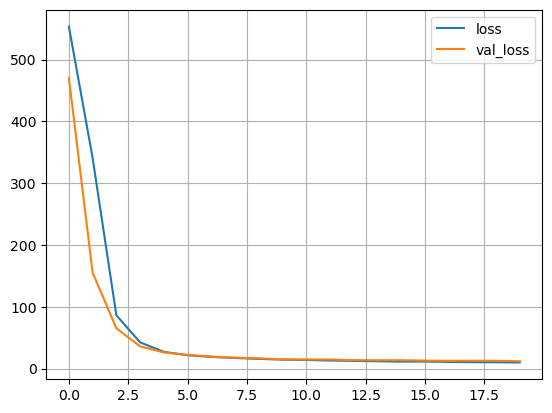

In [33]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [34]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 21.8304


21.830352783203125

In [35]:
model.predict(x_test[:3])

1/1 [==============================] - 0s 102ms/step


array([[ 8.226031],
       [16.863625],
       [21.532545]], dtype=float32)

In [36]:
y_test[:3]

array([ 7.2, 18.8, 19. ])

分類深度神經網路

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from tensorflow.keras.datasets import fashion_mnist
(x_train_set,y_train_set),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [47]:
x_train_set.shape,y_train_set.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

9


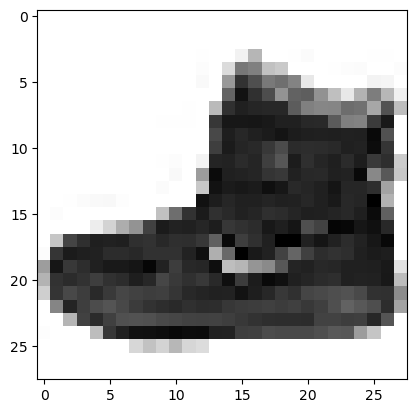

In [48]:
i=0
print(y_train_set[i])
plt.imshow(x_train_set[i],cmap='binary')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid=train_test_split(
    x_train_set,y_train_set,random_state=1)

In [50]:
x_train=x_train/225.0
x_valid=x_valid/225.0
x_test=x_test/225.0

In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [52]:
model=Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(units=300,activation='relu'),
    Dense(units=200,activation='relu'),
    Dense(units=100,activation='relu'),
    Dense(units=10,activation='softmax'),
])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316810 (1.21 MB)
Trainable params: 316810 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'sgd',metrics=['accuracy'])

In [55]:
train=model.fit(x_train,y_train,
                epochs=20,
                validation_data=(x_valid,y_valid))

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.7350 - accuracy: 0.7561 - val_loss: 0.6529 - val_accuracy: 0.7769
Epoch 2/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4906 - accuracy: 0.8283 - val_loss: 0.5012 - val_accuracy: 0.8210
Epoch 3/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4389 - accuracy: 0.8449 - val_loss: 0.4515 - val_accuracy: 0.8392
Epoch 4/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4076 - accuracy: 0.8557 - val_loss: 0.4167 - val_accuracy: 0.8504
Epoch 5/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3855 - accuracy: 0.8632 - val_loss: 1.0123 - val_accuracy: 0.6660
Epoch 6/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3664 - accuracy: 0.8712 - val_loss: 0.6405 - val_accuracy: 0.7969
Epoch 7/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3495 - accuracy: 0.8744 - val_loss: 0.3902 - val_accuracy:

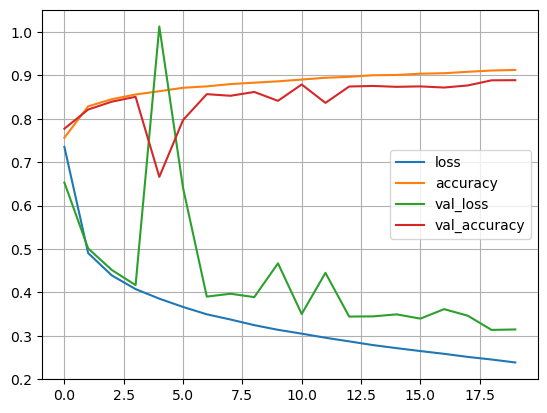

In [56]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [57]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3459 - accuracy: 0.8791


[0.3458826541900635, 0.8791000247001648]

In [59]:
y_proba=model.predict(x_test)
y_proba[:3].round(2)

313/313 [==============================] - 0s 839us/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [60]:
y_pred=np.argmax(y_proba,axis=1)
y_pred[:3]

array([9, 2, 1])

In [61]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[792,   0,  15,  45,   4,   1, 126,   0,  17,   0],
       [  2, 963,   0,  28,   3,   0,   2,   0,   2,   0],
       [ 12,   0, 767,  21,  93,   2,  97,   0,   8,   0],
       [ 10,   4,   7, 938,  14,   0,  22,   0,   4,   1],
       [  0,   1,  83,  59, 782,   0,  68,   0,   7,   0],
       [  0,   0,   0,   1,   0, 957,   0,  30,   3,   9],
       [ 99,   1,  62,  40,  60,   0, 721,   0,  17,   0],
       [  0,   0,   0,   0,   0,  18,   0, 971,   1,  10],
       [  4,   0,   1,   8,   4,   2,   3,   4, 974,   0],
       [  0,   0,   0,   0,   0,  11,   1,  62,   0, 926]])